# Apuntes de Introduction to ml

## Glosario
features -> Se refiere a las variables empleadas para construir los modelos de predicción de *ml*.

Knn -> Abrebiatura de *K nearest Neighbor* O vecino más cercano.
Sparse data -> Se refiere a datos con multiples features binarios, en los cuales se encuentra presente un gran número de ceros.

dataset

overfiting

underfiting

parámetros <- Se trata de elemntos de construcción de un modelo de predicción. Pueden estar fijados por el usuario como condiciones iniciales, o bien ser el resultado del entrenamiento del modelo.


## I. Librerías
Para lamar las librerías en Python empleamos *import*

In [1]:
# !pip install mglearn
# !pip install --upgrade jedi==0.17.2
# !pip install graphviz

In [1]:
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import jedi
import graphviz
import os

### 1. NumPy
*NmPy* es una librería que nos ofrece herramientas matemáticas y para crear arreglos de números
Creamos un numpy array:

In [3]:
x = np.array([[1,2,3],[4,5,6]])
print(x)
print("x:\n{}".format(x))

[[1 2 3]
 [4 5 6]]
x:
[[1 2 3]
 [4 5 6]]


### 2. SciPy 
Nos ofrece múltiples herramientas para cálculos computacionales como las sparse matrix
1. Creamos una matriz con diagonal uno y el resto de la matriz sean ceros

In [4]:
eye = np.eye(4)

print("NumpY array:\n", eye)

NumpY array:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


2. Ahora convertiremos esa matriz en una *sparce matrix*:

In [5]:
sparce_matrix = sparse.csr_matrix(eye)

print("\nSciPy sparse CSR matrix:\n", sparce_matrix)


SciPy sparse CSR matrix:
   (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


Cuando las matrices son muy grandes, es conveniente usar *sparce matriz* para ahorrar espacio en memoria.

### 3. matplotlib
Es una de las principales librerías para crear gráficas
1. Creamos 100 números entre -10 y 10

In [40]:
x = np.linspace(-10,10,100)

2. Creamos el seno de x para obtener un segundo arreglo

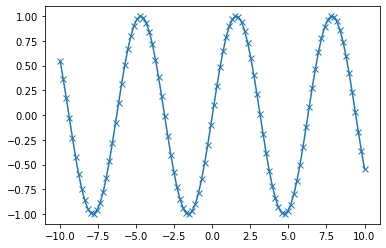

In [41]:
%matplotlib inline
y = np.sin(x)

plt.plot(x,y, marker="x")

### 4. Pandas
Es una librería para análisis y ordenamiento de datos. Posee su propia estructura de datos denominada
data frame, la cuál está inspirada en las data frames de *R*. Permite emplear queries estilo *SQL* para unir tablas. En contraste con *NumPy*, permite que datos de diferentes tipos se encuentren en la misma tabla, aunque los datos de cada columna si deben ser del mismo tipo. También permite importar datos de muy diversas fuentes como *SQL*, *Excel* y *CSV*.
1. Creamos un arreglo con nombres de personas:

In [9]:
data = {
    'Nombre' : ["Juan", "María", "Ana", "Candy"],
    'Lugar' : ["Londres", "NY", "UK", "Estocolmo"],
    'edad' : [5, 10, 30, 40]
}

2. Convertimos los datos de la lista en una *pandas data frame*.

In [10]:
data_pandas = pd.DataFrame(data)
display(data_pandas)

,Nombre,Lugar,edad
0,Juan,Londres,5
1,María,NY,10
2,Ana,UK,30
3,Candy,Estocolmo,40


3. Un query para seleccionar a las personas mayores a 30 años:

In [11]:
display(data_pandas[data_pandas.edad > 10])

,Nombre,Lugar,edad
2,Ana,UK,30
3,Candy,Estocolmo,40


### 5. Ejemplo de clasificación
En este ejercicio se clasificaran las especies de la planta *Iris Setosa*
1. Cargamos la dataframe, la cual forma parte del kit de *sklearn*

In [12]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [13]:
print("Keys of iris_dataset:\n", iris_dataset.keys())

Keys of iris_dataset:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


*DESCR* Contiene una breve descripción del contenido de la *data set*:

In [14]:
print(iris_dataset['DESCR'][:1993] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Las *labels* a predecir se encuentran en la variable *target_names*.

In [15]:
print("Target names:",iris_dataset['target_names'])

Target names: ['setosa' 'versicolor' 'virginica']


La variable *feature_names*, por otro lado, contiene la descripción de cada uno de los *fetures*.

In [16]:
print("Feature names:\n", iris_dataset['feature_names'])

Feature names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Los datos en sí están contenidos en las variables *target* y *data*. La variable *data* contiene las medidas:

In [17]:
print("Type of data:", type(iris_dataset['data']))

Type of data: <class 'numpy.ndarray'>


Las comlumnas en este *array* corresponden a datos, mientras las filas corresponden a especímenes de la flor.

In [18]:
print("Shape of data:", iris_dataset['data'].shape)

Shape of data: (150, 4)


Contiene 150 flores distintas, con las tres variables que describimos anteriormente. En *ml* las filas son llamadas *samples*, mientras que las columnas son denominadas *features*.

In [19]:
print("First five rows of data:\n", iris_dataset['data'][:5])

First five rows of data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


En cambio, *target* contiene el nombre de la especie a la que cada flor pertenece, cifrado en un arreglo numérico.

In [20]:
print("Type of target:", type(iris_dataset['target']))

Type of target: <class 'numpy.ndarray'>


In [21]:
print("Shape of target:", iris_dataset['target'].shape)

Shape of target: (150,)


In [22]:
print("Target\n",iris_dataset['target'])

Target
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


La variable *target* contiene las tres especies cifradas numéricamente del 0 al 2. En un *numpy array* contiene una observación por cada una de las 150 ejemplares de plantas registradas.

## 5.1 Test y trining set

No es posible usar el mismo *data set* para construir un modelo, y para evaluarlo. Debido a que nuestro modelo puede recordar la base empleada para crearlo y predecir adecuadamente cualquier punto de ella. A esto se le denomina **remebering** y nos indica que nuestro modelo **no generaliza bien**, es decir que no tendrá el mismo desempeño con datos que no conoce.

Para evaluar el desmepeño del modelo, es necesario contar con datos que no hayan sido empleados para ajustar el modelo. Los datos empleados para ajustar el modelo se denominan **trining set** y los datos empleados para evaluar el modelo, se denominan **test set**.

scikit-learn contiene una función, denominada *train_test_split*, que permite dividir una *data set* en *trining* y *test set*. Esta función, por definición, extrae el 75% de los datos para *trining set* y los datos restantes para el *test set*. Anunque la proporción de datos empleada en cada una de las colecciones de datos es arbitraría, es una práctica aceptable tomar esta proporción (75% para *trining set* y 25% para *test set*).

Por conevnción, el arreglo de *features* es denotado por una **X** mayúscula, mientras las *labels* son denotadas por una **y** minúscula.

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

La función *train_test_split* nos permite generar los *training* y *test datasets*. el argumento *random_state* nos permite fijar una semilla aleatoria para que el proceso sea replicable con los mismos resultados cada vez que se ejecute.

In [24]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (112, 4)
y_train shape: (112,)


In [25]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (38, 4)
y_test shape: (38,)


## 5.2 EDA
EDA son las siglas de *Exploratory data analisys* y suele ser el primer paso para detectar posibles inconsistencias en los datos, ver la mejor forma en que podría responderse alguna pregunta, o averiguar si nuestros datos necesitaran alguna transformación antes de ser analizados.

Cuando tenemos pocos *features* una herramienta útil de visualización son los *pair plots* los cuales muestran el correlograma de cada combinación de variables, y el histograma individual de cada una de estas.

1. Creamos un *data set* con los componentes del *traning set*.

In [26]:
iris_dataframe = pd.DataFrame(X_train, columns = iris_dataset.feature_names)

2. Empleamos la *data frame* recien creada para crear nuestro *pair plot*.

array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

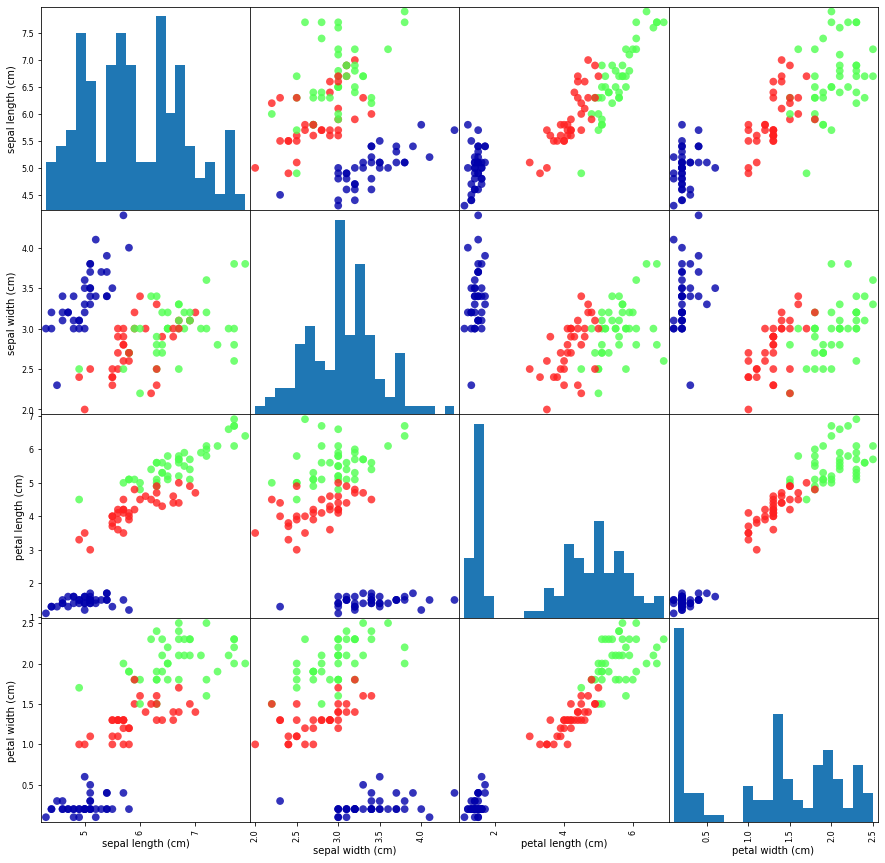

In [27]:
%matplotlib inline
pd.plotting.scatter_matrix(iris_dataframe, c = y_train, figsize = (15, 15), marker = 'o', hist_kwds = {'bins' : 20}, s = 60, alpha = 0.8, cmap = mglearn.cm3)

En las gráficas se pueden apreciar claramente tres tipos relativamente diferentes de plantas. Lo cuál nos lleva a plantearnos un problema de *ml* para clasificarlos de forma adecuada.

### 5.3 Clasificación por k-Nearest Neighbors
Para realizar la clasificación emplearemos el método de agrupamiento por vecino más cercano, *k nearest neighbors*. Este algoritmo conciste en considerar en considerar los puntos con vecindad más cercana.

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)

Esto nos permite encapsular el algorutmo del modelo en un objeto que puede ser ajustado, y evaluado posteriormente.
1. Ajustamos el modelo sobre la *training set*.

In [29]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

2. Con el modelo ajustado, ahora es posible realizar predicciones.
Por ejemplo supongamos que encontramos una flores con sépalos de 5 cm de largo, 2.9 cm de ancho y pétalos de 1cm de largo y 0.2 cm de ancho. El algoritmo que hemos entrenado, nos permite predecir en qué especie sería clasificado.
Primero definimos, la nueva observación con las características descritas.

In [30]:
X_new = np.array([[5,2.9,1,0.2]])
print("X_new.shape:", X_new.shape)

X_new.shape: (1, 4)


Para realizar la predicción ahora podemos emplear el *method*  *predict()* del objeto *knn* recién creado.

In [31]:
prediction = knn.predict(X_new)
print("Prediction:", prediction)
print("Prediction target name:", iris_dataset['target_names'][prediction])

Prediction: [0]
Prediction target name: ['setosa']


El modelo, predice que la flor descrita pertenece a la categoría setosa.
3. Evaluando el modelo
Para evaluar el modelo emplearemos la *test set* la cual tiene la ventaja de estar previamente etiquetada, pero que no ha sido vista nunca por el modelo. Esto nos permitirá evaluar de forma adecuada el desmpeño del modelo. El *accuracy* del modelo es la fracción de las flores que fueron correctamente clasificadas por el modelo.

In [32]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n", y_pred)

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [33]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


El modelo predice aceptablemente las etiquetas de las flores. Una forma alternativa para calcular este indicador es empleando el *method* *score* del objeto *knn* que contiene al modelo.

In [34]:
print("Test set score:{:.2f}".format(knn.score(X_test, y_test)))

Test set score:0.97


## Supervised Learning
El *supervised learning* o aprendizaje supervisado consiste en un grupo de algoritmos cuyo fin consiste en predecir las etiquetas *labels* de un grupo de observaciones, dadas sus características *features*. Es necesario contar con una base de entrenamiento previamente etiquetada, la cuál a menudo requiere de esfuerzo humano. Existen dos tipos de problemas de aprendisaje supervizado:
1. La clasificación
2. La regresión
En la clasificación se busca predecir la clase de etiqueta, que está definida con base en una serie de posibles valores que pueden asumir. Estos valores, en muchas ocaciones pueden ser binarios,  bien multiclase.
La regresión, en cambio consite en problemas cuya etiqueta puede anotarce por punto flotante. Por predecir el ingreso de una persona, con base en una serie de características como su educación, su edad y en dónde vive. En estos casos la predicción puede consistir en un número o en un rango dentro del cuál puede caer.

### Generalización, *overfiting* y *underfiting*
Nuestro principal objetivo consiste en producir un modelo capaz de ajustar en el *trining set* y realizar predicciones precisas en los datos no vistos de la *test set*. Si el modelo ajusta razonablement en los datos no vistos, entonces decimos que el modelo es capaz de generalizar del *trining* al *test set*.
En ocaciones construimos modelos demasiado complejos que probocan un excelente ajuste dentro de nustra *trining set* pero, que no generaliza bien en la *test set* a esto se le denomina *overfitting*. Esto ocurre debido a que se captan demasiado las particularidades de nuestra *trining set*. Conforme hacemos más complejo el modelo, nos enfocamos más en los puntos individuales de nuestro *trining set* y por ende no tendrá una buena capacidad para generalizar con datos no vistos.
Por otro lado, un modelo demasiado simple, no será capaz de captar las particularidades de los datos y obtendrá conclusiones demasiado simplistas. A esto se le denomina *underfitting*.
Entre más datos se tenga, tanto observaciones como *features*, más complejo puede ser un modelo sin caer en *overfitting*.

### *Data sets* de ejemplo
Un ejemplo sencillo de **clasificación**:
1. Generamos la dataset

In [35]:
X,y = mglearn.datasets.make_forge()

Graficamos la dataset generada

X.shape: (26, 2)


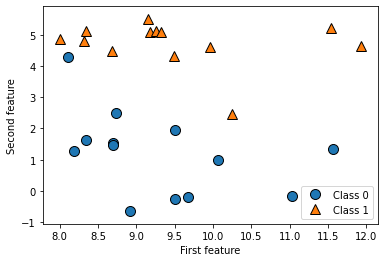

In [36]:
mglearn.discrete_scatter(X[:,0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc = 4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape:", X.shape)

Este ejemplo muestra 26 observaciones con dos *features*.

Para el caso de la **regresión** usaremos de ejemplo una curva sintética:

Text(0, 0.5, 'Target')

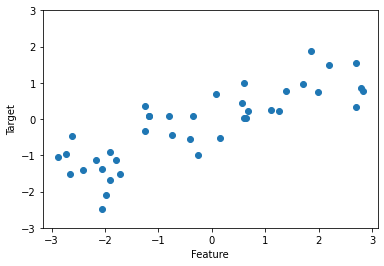

In [37]:
X,y = mglearn.datasets.make_wave(n_samples = 40)
plt.plot(X,y, 'o')
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")

También serán usadas *datasets* de la vida real, que están incluidas en las bases de *scikit-learn*, como la data sets de cancer de pulmón. En esta base, los tumores están etiquetados como maligno o benigno. Los datos se encuentran en *load_breast_cancer*:

In [38]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [39]:
print("Shape of cancer data:", cancer.data.shape)

Shape of cancer data: (569, 30)


Esta *dataset* está compuesta por 569 observaciones con 30 *features*.

In [40]:
print("Sample counts per class:\n", {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

Sample counts per class:
 {'malignant': 212, 'benign': 357}


La base contiene 212 observaciones con tumores malignos, y 357 con tumores benignos.

In [41]:
print("Feature names:\n", cancer.feature_names)

Feature names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


Esta última instrucción nos muestra una relación de los distintos *features* de la *dataset*.

En cuanto a la *dataset* real para regresión emplearemos la *Boston Housing dataset* la cual muestra el valor medio de las casas. Contiene 506 observaciones, con 13 *features*.

In [42]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape:", boston.data.shape)

Data shape: (506, 13)


No solo tomaremos estos *features* si no que expandiremos la base empleando todos sus productos, es decir multiplicando cada variable por el resto. También denominados **interacciones**.

In [43]:
X,y = mglearn.datasets.load_extended_boston()
print("X.shape:", X.shape)

X.shape: (506, 104)


Esta base incluye las 13 *features* originales, y 91 posibles combinaciones de dos variables.

## K-Nearest Neighbors

### K-Nearest Neighbors en problemas de clasificación

Se trata de algoritmo de *ml* más simple. Construir el modelo consiste únicamente en cargar el *training dataset*. Para realizar las predicciones sobre un nuevo componente, el algoritmo únicamente identifica a que categoría pertenecen los vecinos más cercanos y le asigna esa misma categoría.

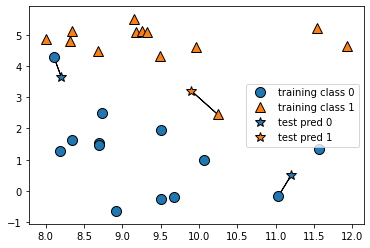

In [44]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

Los nuevos puntos de datos, identificados con una estrella, son asignados a la categoría de su vecino más cercano. En lugar de considerar un solo vecino, como en este caso, podríamos considerar un número arbitrario de vecinos. Cuando se consideran más de un vecino, se recurre al método de votación, en el cúal el mayor número de vecinos que coincida con la categoría decidirá que etiqueta debe adoptar.

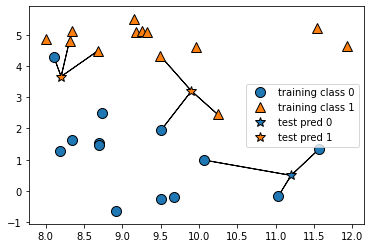

In [45]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

Para poder ajustar, y evaluar el desempeño de un modelo de *ml* el primer paso es dividir la *data set* en *trining* y *testing*.

In [46]:
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

Una vez dividida la *dataset*, ahora importamos una instancia del modelo, en la cuál especificamos los parámetros. En este caso el número de vecinos a considerar.

In [47]:
from sklearn.neighbors import KNeighborsClassifier 
clf = KNeighborsClassifier(n_neighbors=3)

Ahora empleamos el modelo para entrenar la base, que como vimos, en este caso es únicamente precargarla.

In [48]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Para realizar las predicciones, una vez que hemos entrenado la instancia, empleamos el *method* *predict()*.

In [49]:
print("Test set predictions:", clf.predict(X_test))

Test set predictions: [1 0 1 0 1 0 0]


Finalmente, para evlauar el desempeño de nuestro modelo, y saber que tan bien es capaz de generalizar, empleamos el *method* de *score()*.

In [50]:
print("Test set predictions: {:.2f}".format(clf.score(X_test, y_test)))

Test set predictions: 0.86


En el caso de dos dimenciones, es posible mapear el rango de posibles deciciones para asignar etiquetas, mediante bandas de desición. Estas muestran las fronteras entre las cuales se ubicaran en una u otra categoría.

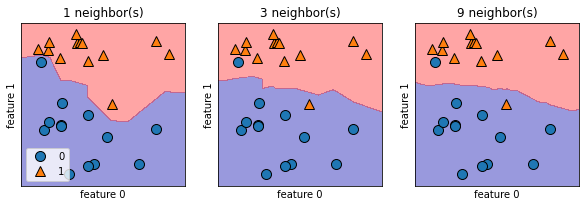

In [51]:
fig, axes = plt.subplots(1,3, figsize = (10, 3))
for n_neighbors, ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill = True, eps=0.5, ax=ax, alpha = .4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
    axes[0].legend(loc=3)

En este ejemplo es posible ver como usar un solo vecino resultó en una mejor clasificación del *test set*. Agregar más vecinos hace más simple el modelo.
Para profundizar en la relación entre la complegidad del modelo y qué tan bien generaliza, vamos a emplear la serie de cancer.

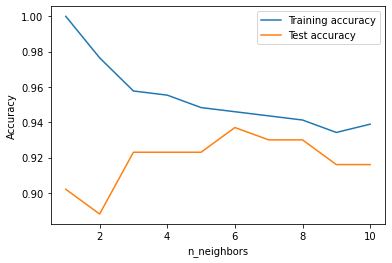

In [52]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label = "Training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "Test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
    

Al ir variando el parámetro de número de *neighbors* vemos como el accuracy del *traning dataset* va disminuyendo. EL modelo, en este caso es más complejo, entre menor sea el número de *neighbors*, sin embargo podemos ver un trade off en su capacidad de generalización, pues el accuracy de la *test set* es menor, y va aumentando conforme se incremente el número de vecinos. 

### K-Nearest Neighbors en problemas de regresión
También es posible plantear un algoritmo de *k-nearest neighbor* para problemas de regresión. Comencemos considerando un solo vecino más cercano y apliquémoslo a la base *wave* que consideramos anteriormente.


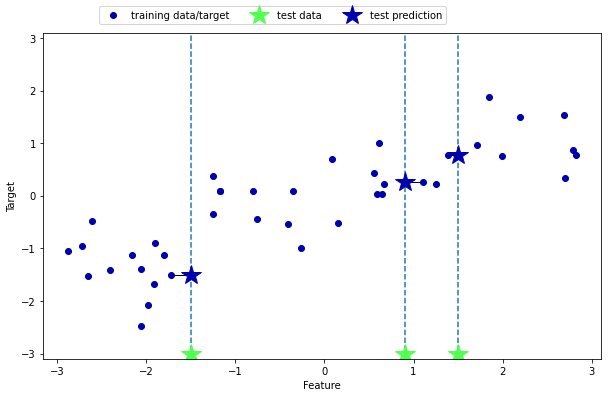

In [53]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

De forma similar a que ocurre con los problemas de clasificación, los nuevos datos añadidos (estrella verde) serán etiquetados con el valor en *y*, del vecino más cercano. Valor asignado representado por la estrella azul. Para el caso de tres vecinos:

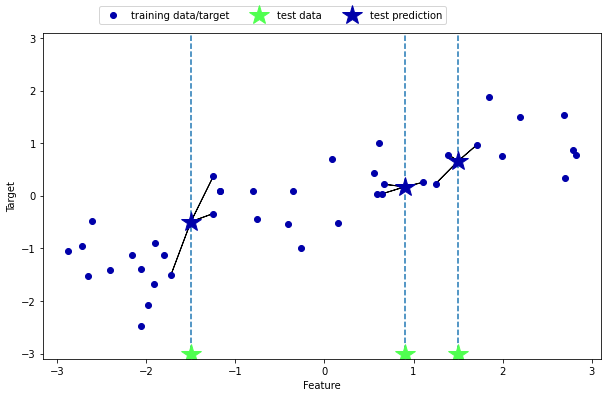

In [54]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

Para el caso de *n* vecinos, tomará el promedio de las distancias para estimar la etiqueta.

En *sklearn* también existe un algoritmo disponible para emplear este modelo de *ml* para regresiones. Aquí un ejemplo:

1. Primero creamos una dataset para ejemplificar.

In [55]:
from sklearn.neighbors import KNeighborsRegressor
X,y = mglearn.datasets.make_wave(n_samples=40)

2. Ahora dividimos la base en *test* y *training*.

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Ahora creamos una instancia del modelo de *knn* para *regresión*. En la definición de parámetros, estableceremos un modelo con 3 vecinos.

In [57]:
reg = KNeighborsRegressor(n_neighbors=3)

Empleamos la instancia generada, para ajustar el modelo usando el *training set*.

In [58]:
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

Una vez entrenado el modelo, ahora podemos emplearlo para generar predicciones:

In [59]:
print("Test set prediction:\n", reg.predict(X_test))

Test set prediction:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


El método para evaluar los resultados de una regresión es el *$R^{2}$*.Este es un coeficiente de determinación que nos permite evaluar que tan bien ajusta un modelo de regresión. Usualmente se encuetra entre *0* y *1*. Mientras *1* corresponde a una predicción perfecta, *0* corresponde a un modelo constante que solo predice el promedio de las respuestas del *training*. El indicador *$R^{2}$* puede ser negativo, lo cual mostraía una correlación inverza.

In [60]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


En este caso, el indicador es de =.83, lo cual hace referencia a que se trata de un modelo relativamente aceptable.

De forma similar a cómo hicimos para las bandas de desición, podemos estimar los puntos en que nuestro modelo asignaría las predicciones, para diferentes sets del parámetro *n_neighbors*:

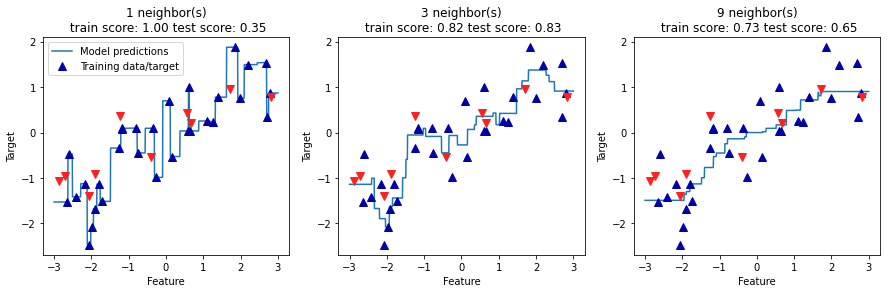

In [61]:
fig, axes = plt.subplots(1,3, figsize=(15,4))
# Creamos 1,000 data points comprendidos entre -3 y 3
line = np.linspace(-3, 3, 1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9], axes):
    # Creamos predicciones empleando 1, 3 y 9 vecinos
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, "^", c = mglearn.cm2(0), markersize = 8)
    ax.plot(X_test, y_test, "v", c = mglearn.cm2(1), markersize = 8)
    
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    axes[0].legend(["Model predictions", "Training data/target"], loc="best")

A partir de la gráfica podemos ver cómo usar únicamente un vecino, cada punto ejerce una gran influencia sobre las predicciones. AL considerar más vecinos vemos cambios menos abruptos en las predicciones, pero tampoco captan el valor real muy bien.

Existen dos parámetros de ajuste en los modelos de *Knn* uno es el número de vecionos, y el otro, es cómo se mide la distanciaentre cada punto. Por defecto se emplea la *distancia euclidiana*.

Este modelo es bastante simple, pero puede ser muy efectivo. Es necesario preprocesar los datospara obtener un mejor desempeño. Este modelo no suele desempeñarse bien en datos con demaciados *features* (más de 100), y tampoco tiene un buen desempeño con *features* que contienen demasiados ceros (también llamados *sparse features*, tal como se menciono antes).

## Modelos de regresión lineal
Los modelos de regresión lineal emplean funciones lineales apra predecir la variable objetivo (*target*), con base en los *features*.
La formula predictiva general de los modelos de regresión lineal es la siguiente:

* $\hat{y}=w[0]*x[0]+w[1]*x[1]+...+w[p]*x[p]+b$

En donde $x[0]$ a $x[p]$ denotan los *features* de algún dato puntual de la *dataset*, mientras $w$ y $b$ son parámetros que son aprendidos por el modelo. $\hat{y}$ consiste en la predicción que el modelo realiza sobre algún punto en especifico. 

Supongamos que tenemos una *dataset* con un solo *feature*. En ese caso, la ecuación líneal de su modelo sería:

$\hat{y}=w[0]*x[0]*b$

Esta ecuación, de una sola *feature* corresponde a la ecuación de la línea recta en un espacio bidimencional, en donde $w[0]$ es la pendiente, mientras $b$ es la ordenada al origen. En caso de contener más *features*, $w$ contendrá la pendiente de cada una de ellas. La respuesta predicha, puede ser considerada como la suma ponderada de cada uno de los *features*, siendo $w$ el peso de cada uno de los *features*, los cuales además pueden ser negativos

w[0]: 0.393906  b: -0.031804


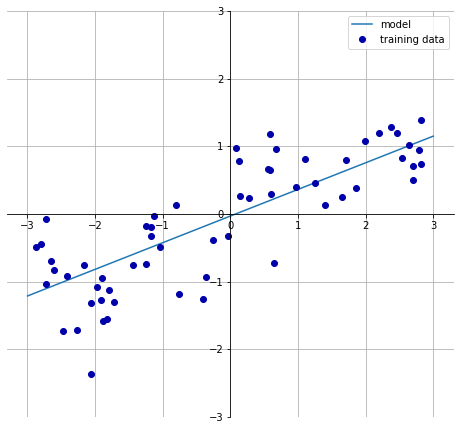

In [62]:
mglearn.plots.plot_linear_regression_wave()

El modelo de regresión lineal de una sola variable o *feature*nos muestra la línea en un espacio bidimencional, con su pendiente y su ordenada al origen. Si comparamos este modelo con el de *Knn* aparentemente se están perdiendo detalles, y en un modelo demasiado simple, como es el caso de una sola *feature* es cierto. Pero esto cambia cuando añadimos múltiples *features*, en especial cuando se tienen más *features* que *data points*.

Existen múltiples modelos de regresión lineal. Su principal diferencia radica en cómo son aprendidos  los parámetros $w$ y $b$ del *trining data*, y cómo se controla la complegidad del modelo.

### Ordinary least squares OLS (Mínimos cuadrados ordinarios)
El modelo de mínimos cuadrados ordinarios es el modelo de regresión lineal más simple. Este encuentra los parámetos $w$ y $b$ que minimizan el error promedio estandar entre la predicción y el valor real. El **mean squared error** consiste en el cuadrado de la suma de las diferencias entre los valores predichos y los reales, dividido entre el número de observaciones.
Este tipo de regresión lineal no tiene parámetros de ajuste. Esto resulta ventajoso para el ajuste, pero no permite controlar la complegidad del modelo.

In [63]:
from sklearn.linear_model import LinearRegression
X,y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

Los parámetros del modelo, tambien denominados *wigths* o coeficientes se encuentran en el atributo *coef_attribute*. Mientras la ordenada al origen se encuentra en *intercept_attribute*.

In [64]:
print("lr.coef:", lr.coef_)
print("lr.intercept", lr.intercept_)

lr.coef: [0.39390555]
lr.intercept -0.03180434302675976


Por definición sklearn almacena los resultados del entrenamiento en atributos que terminan con guión bajo *_*, para diferenciarlos de paraámetros definidos por los usuarios.

El *intercept_* es un solo número flotante, mientras el *coef_* consiste en un *numpy array* con cada uno de los coeficientes de los *features* empleados en el ajuste del modelo.

Ahora veamos el desempeño del modelo:

In [65]:
print("Training set socre: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score:{:.2f}".format(lr.score(X_test, y_test)))

Training set socre: 0.67
Test set score:0.66


La $R^{2}$ de = 0.66 no es considerada demasiado buena. Por otro lado, podemos ver como  el score es similar tanto para el *training* como para el *test set* respectivamente. Debido al bajo score, podemos decir que nuestro modelo está *underfitting*. 

Con un solo *feature* el modelo es demasiado simple. Pero si tenemos la oportunidad de incorporar más *features* al modelo, este incrementa su complejidad, y por ende puede *overfitting*, es decir asumir las particualridades del *training set* y no generalizar bien en el *test set*.

Ahora vamos a ajustar un modelo más complejo con múltiples *features*. El *Boston Housting dataset* contiene 506 *samples* y 105 *derivates features*.

In [66]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

AL comparar el *training* y el *test* score encontramos una buena presición en el trining set, pero no así en el *test*

In [67]:
print("Traning set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Traning set score: 0.95
Test set score: 0.61


Esta gran discrepancia entre  los scores de la *training* y la *test* datasets es una clara señal de sobreajuste (*overfitting*). Y por ende es necesario encontrar una manera de controlar la complejidad del modelo. Esto puede hacer controlando más los *features*.

In [68]:
### Ridge regression

La *Ridge regression* tambien es un modelo de regresión lineal. Sin embargo en este modelo los coeficientes $w$ no solo sirven como predictores, si no que también como penalizadores *constraint*. Estas *constrains* se manifiestan con valores cercanos a cero, para los *features* que buscan ser penalizados. A este proceso se le denomina regularización. EL modelo se restringe para evitar el *overfitting*. El tipo de regularización empleado por el *ridge regression* es denominado *L2* debido a que penaliza el cuadrado L2 de los coeficientes.

Veamos cómo se implementa este modelo en la base *Boston Housing*.

In [69]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score:{:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score:{:.2f}".format(ridge.score(X_test, y_test)))

Training set score:0.89
Test set score:0.75


Aunque el *traininf score* de la *ridge regression* es menor que el de la regresión lineal simple, el *test score* es considerablemente mayor. Esto se debe a que con el modelo simple estamos sobreajustando *overfitting* nuestros datos. Debido a que *ridge* es un modelo más restrictivo nos ayuda a evitar este problema, debido a que un modelo menos complejo implica un peor desempeño en el *training set* pero una mejor capacidad de generalización. Debido a que nuestro principal interés es la generalización, en este caso el modelo *ridge* resulta más favorable.

El parámetro de ajuste del modelo *ridge* es el *alpha* un mayor *alpha* implica mover los coeficientes más cerca de cero, lo que disminuye el desmepeño en el *training set* pero mejora la generalización.

In [70]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score:{:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score:{:.2f}".format(ridge10.score(X_test, y_test)))

Training set score:0.79
Test set score:0.64


In [71]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score:{:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score:{:.2f}".format(ridge01.score(X_test, y_test)))

Training set score:0.93
Test set score:0.77


Este *alpha* de 0.1 parece mostrar un mejor desempeño que el *alpha* de 10. Un valor más alto de *alpha* implica un modelo más restringido, por lo que es de esperarce coeficientes *coef_* más pequeños.

In [33]:
plt.plot(ridge.coef_, 's', label = "Ridge alpha = 1")
plt.plot(ridge10.coef_, 's', label = "Ridge alpha = 10")
plt.plot(ridge01.coef_, 's', label = "Ridge alpha = 0.1")

plt.plot(lr.coef_, 'o', label = "LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

plt.hlines(0,0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

NameError: name 'ridge' is not defined

Este gráfico muestra la magnitud de los 100 coeficientes que componen el modelo. Podemos ver que en el caso de la regresión lineal simple, los coeficientes tienen valores altos. Mientras que en el modelo *ridge* los coeficientes se van acercando a cero, conforme el valor de *alpha* es mayor.

Otra forma de representar esta diferencia es empleando **curvas de aprendisaje**, las cuales comparan el tamaño de del *test*, con el coeficiente $R^{2}$.

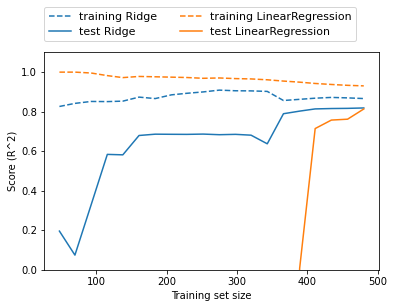

In [73]:
mglearn.plots.plot_ridge_n_samples()

Entre más datos se tengan, mejora el desempeño de ambos modelos. Sin embargo, en el caso del modelo *ridge* el desempeño del *test* es mejor que el de la regresión simple cuando se tienen pocos datos. 

### LASSO regression

De modo similar al modelo *ridge*, el modelo *lasso* penaliza los coeficientes $w$ para acercarlos a cero, epro emplea una técnica de regularización distinta denominada $L1$. La principal diferencia radica en que algunos coeficientes serán exactamente cero, lo cual implica que algunos *features* serán completamente ignorados por el modelo. Lo cual implica una selección automática de los *features* más reeelevantes.
Veamos cómo se coporta con la *Bosto Housing*.

In [74]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score:{:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score:{:.2f}".format(lasso.score(X_test, y_test)))
print("Number features used", np.sum(lasso.coef_ != 0))

Training set score:0.29
Test set score:0.21
Number features used 4


El modelo tiene un mal desempeño tanto para el *trining* como para el *test set* lo cual implica que estamos *underffiting*, y solamente estamos empleando 4 *features* de los 104 disponibles.
*Lasso* también cuenta con el parámetro de regularización *alpha* que controla que tan estricto será el algoritmo para descartar *features*. Por definición es de $alpha=1$, para reducir el *underffiting* podemos tratar de reducir este parámetro. Al hacerlo también será necesario incrementar el número máximo de iteraciones permitidas *max_iter*.

In [75]:
lasso001 = Lasso(alpha = 0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso001.coef_ != 0))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


Un parámetro *alpha* más pequeño mejora considerablemente nuestro modelo, tanto para el *test* como para el *training*. El desempeño es significativamente mejor que en el caso del modelo *ridge*. Estamos empleando 33 variables de las 104 disponibles.
Si bajamos demasiado el valor de *alpha* sin embargo al tener un modelo demasiado complicado, podemos caer nuevamente en *overffiting*:

In [76]:
lasso00001 = Lasso(alpha = 0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso00001.coef_ != 0))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Text(0, 0.5, 'Coefficient magnitude')

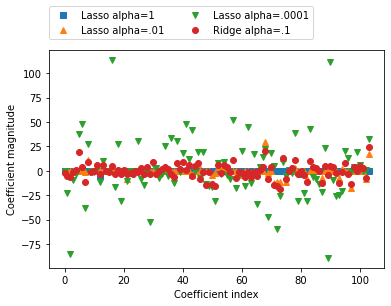

In [77]:
plt.plot(lasso.coef_, 's', label = "Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label = "Lasso alpha=.01")
plt.plot(lasso00001.coef_, 'v', label = "Lasso alpha=.0001")
plt.plot(ridge01.coef_, 'o', label = "Ridge alpha=.1")
plt.legend(ncol=2, loc=(0,1.05))
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

Para el caso de $alpha=1$ la mayoría de los coeficientes son cero, además que el resto de los coeficientes son de muy poca magnitud. En el caso de $alpha=0.0001$ vemos que la magnitud de los coeficientes es mayor, y que se usa gran parte de ellos, sobreajustando el modelo*overffiting*. EL mejor modelo lo encontramos en el caso de $alpha=0.01$ que empleó 33 +features* distintas a cero. Muy similar al modelo *Ridge*.
En la práctica *Ridge* es la mejor elección entre estos dos modelos. Sin embargo *Lassso* es una buena opción cuando se dispone de muchas *features* y además se considera que varias de ellas no son significativas. Otra ventaja, es que el modelo Lasso es más fácil de interpretar debido a que puede seleccionar un subset de las variables del *training set*.
*scikit-learn* también contiene la clase *ElasticNet* que ofrece una combinación de los dos modelos antes mencionados. Esta combinación funciona mejor, solo que hay que tener en consideración que será necesario ajustar dos parámetros de regularización, el $L1$ y el $L2$.

### Modelos lineales para clasificación

Los modelos lineales también pueden emplearce para realizar clasificaciones. Veamos la clasificación binaria primero. Las predicciones de un modelo linear binario, siguen la siguiente fórmula:

$\hat{y}=w[0]*x[0]+w[1]*x[1]+...+w[p]*x[p]+b>0$

La fórmula funciona de manera similar a la de la regresión lineal simple, con la salvedad de que en lugar de regresar la suma ponderada de los coeficientes, nos va a regresar un número cercano a cero. Si la función resulta menor a cero, estaremos prediciendo que la clase es $-1$. En cambio si es mayor a cero, estaremos prediciendo que la clase es igual a $+1$.
Los dos algoritmos más comunes para la clasificación empleando modelos lineales son **logistic regression** y **linear support vector machines (linear SVMs)**, *SVC* en el caso de un vector de clasificación.

/Users/juliovicenteguadarrama/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


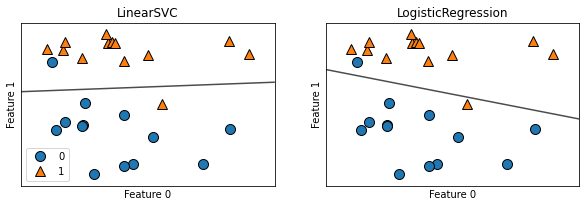

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X,y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1,2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha = 0.7)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

El la gráfica podemos apreciar las bandas de descición de cada uno de los modelos en un plano de dos dimenciones. Estas líneas indican la clase que será asignada a cada nuevo dato. Por default, ambos modelos aplican una regularización del tipo $L2$. El parámetro de ajuste en ambos modelos es denominado *C*. Un *C* más grande implica una menor regularización.

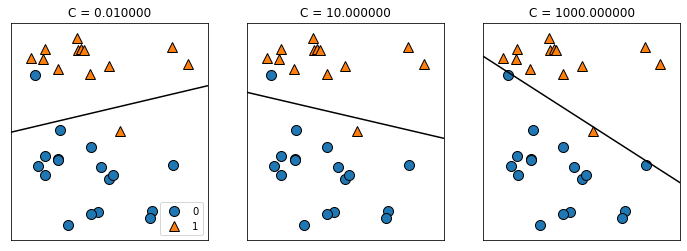

In [79]:
mglearn.plots.plot_linear_svc_regularization()

En la gráfica de la izquierda tenemos un parámetro *C* muy pequeño, que corresponde a una regularización muy grande. Entre la regularización sea más fuerte la banda de desición tenderá a ser más horizontal.
En la gráfica del extremo derecho, tenemos un coeficiente *C* muy grande, lo que implica una regularización muy pequeña, el modelo esta *overfit*. Los modelos de regresión en dos dimensiones son muy restringidos, pero incrementan su eficacia conforme se les añaden más *features*. Vamos a analizar la *Breas Cancer dataset*:

In [80]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.958
Test set score: 0.958


EL parámetro por default de $C=1$ crea un modelo con un buen desepeño, arriba de 95 tanto para *traning* como para *test*. Sim embargo debido a que el *score* de ambos es muy similar, es posible que el modelo esté *underffiting*. Intentemos incrementar $C$ para mejorar el desempeño del modelo.

In [81]:
logreg100 = LogisticRegression(C=100, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.984
Test set score: 0.965


Un mayor valor de $C$ elevó el *score* de ambos, mejorando el desempeño del modelo y conformando nuestra intuición del *underffiting* del modelo pasado. Ahora probemos con un  $C$ demasiado bajo.

In [82]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.937
Test set score: 0.930


/Users/juliovicenteguadarrama/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Al continuar disminuyendo $C$ y obtener un modelo *Underfit*.

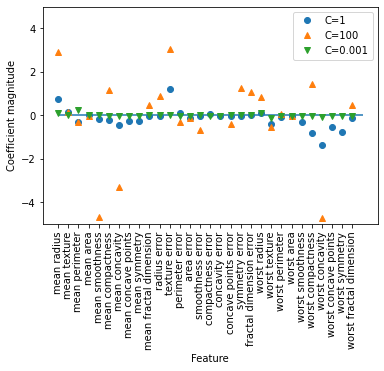

In [83]:
plt.plot(logreg.coef_.T,'o', label="C=1")
plt.plot(logreg100.coef_.T,'^', label="C=100")
plt.plot(logreg001.coef_.T,'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names, rotation = 90)
plt.hlines(0,0, cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

Para obtener un modelo más interpretable, podemos recurrir a una penalización del tipo $L1$.

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


/Users/juliovicenteguadarrama/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


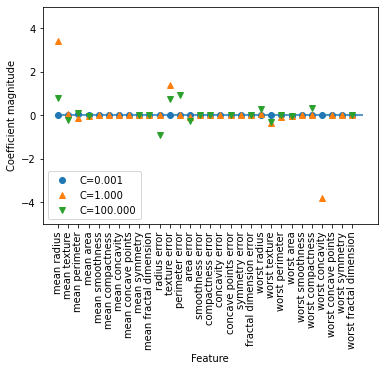

In [84]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty = "l1" , solver='liblinear').fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0,0, cancer.data.shape[1])
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5,5)
plt.legend(loc=3)

De forma similar a los problemas de regresión, los modelos lineales para clasificación definen su complejidad con base en los parámetros de regularización.

### Naive Bayes Classifiers

Los modelos del tipo Naive Bayes son más rápidos que los de regresión lineal y las máquinas de soporte vectorial, pero su desempeño es un poco peor. La razón de su rapidez es que recolectan estadísticas de cada variable. 
Existen tres clases clasificadores Naive Bayes:
1. GaussianNB:
Puede ser empleado para datos contínuos. Toma en cuenta tanto el valor promedio de cada clase, como la desviasión. Este modelo regularmente es usado en datos con muchas dimensiones.
2. BernoulliNB
Asume datos binarios. Contabiliza que tantas veces un *feature* es no cero. Solo contiene un parámetro *alpha*. Funciona mejor con bases que contienen muchos ceros.
3. MultinomialNB
Asume datos contabilizables. Por ejemplo cuantas veces aparece una palabra en una oración. Toma en cuenta el valor promedio de cada clase, como su desviación estándar. Solo contiene un parámetro *alpha*. Ajustar el parámetro no es demasiado crítico, pero puede mejorar el desempeño un poco.

Bernoulli y Multinomial son muy empleados en clasificar texto.

Para realizar las predicciones, cada dato es comparado con las estadísticas de sus respectivas clases, y la mejor coincidencia hace la predicción.

### Árboles de desición
Emplean una arquitectura de reglas if/else para tomar una desición. Cada nodo representa una pregunta, o bien una respuesta final (también denominada hoja).

Oara construir el árbol de desición, el algoritmo busca todo slos posibles test y escoje los más importantes para las variables objetivo.

Para prevenir el sobreahjuste es posible seguir dos estrategias:
1. Detener la creación de árbol pronto *pre-pruning*
2. Construir el árbol, pero luego remover o colapsar los nodos que contengan poca información (*post-pruning* ó *pruning*). 
Un criterio para detener el crecimiento del árbol es limitar la máxima profundidad, limitándo el número de hojas.
En *scikit-learn* se emplea la función *DecisionTreeRegressor* y *DecisionTreeClassifier*. Unicamnete incluyen *pre-pruning*.

Ahora ajustaremos un modelo de árbol de desición empleando la base datos sobre el cancer de pecho.

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)

tree = DecisionTreeClassifier(random_state=0)

tree.fit(X_train, y_train)

print("Accuracy on trining set: {:.3f}".format(tree.score(X_train, y_train)))

print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on trining set: 1.000
Accuracy on test set: 0.937


Vemos que el desempeño del modelo en el *trining set* es del 100%, sin embargo, su desempeño en el *test* es inferior al del modelo lineal que estaba al rededor del $0.95$ de *accuracy*. Si no se acota al modelo, este se hará lo suficientemente compleo como para memorizar todas las etiquetas del *trining*, perjudicando su desempeño en el *test*.

Para evitar esto, se recurre al *pre-prunning* limitando el modelo a un *max_deept = 4* con lo cual indicamos que solamente pueden hacerce 4 preguntas consecutivas. Esto permite reducir la complejidad del modelo, mejorando su desempeño en la test set.

In [14]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


Usando el método de árboles de desición es posible determinar la importancia de los *features*, en donde:

0. No empleado 
1. Predice el *target* perfectamente

In [46]:
print("Feature importances:")
print(tree.feature_importances_)

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


Puede resultar más útil visualizarso gráficamente.

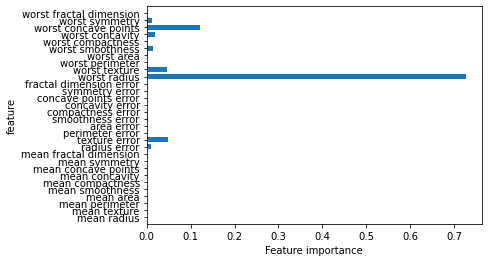

In [48]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)
    
plot_feature_importances_cancer(tree)

Podemos notar como *worst radius* es el *feature* con un mayor peso a la hora de determinar si un tumor es maligno. El echo de que un *feature* no sea recogido por el modelo, no necesariamente significa que no tenga importancia, es posible que la información reelevante que aporte ya sea entregada por algún otro *feature*. Por tales motivos, para poder conocer la importancia de los *features* los modelos lineales son más penalizados pueden ser más útiles.

#### Regresión con árboles de desición

Los árboles de desición no son capaces de realizar predicciones cuando estas se encuentran fuera del rango del *trining data*. Aplicaremos el regresor de árbol de desición al precio de las memorias RAM.

Text(0, 0.5, 'Price in $/Mbyte')

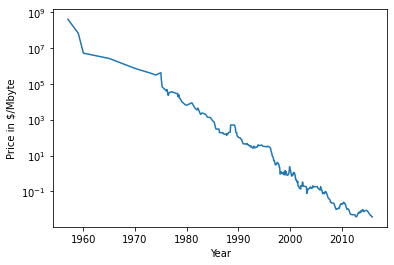

In [3]:
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
# Tomaremos los datos antes del año 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# Prediciendo los precios con base en la fecha
X_train =  data_train.date[:, np.newaxis]
# Usamos una log-transform para una transformación logarítmica de la variable objetivo
y_train = np.log(data_train.price)

# Creamos un objeto con el modelo de árbol de desición
tree = DecisionTreeRegressor(max_depth=3).fit(X_train,y_train)
# Creamos un objeto con el modelo de regresión lineal
linear_reg = LinearRegression().fit(X_train,y_train)

# Predecimos en todos los datos
X_all = ram_prices.date[:, np.newaxis]

# Predecimos con los modelos entrenados:
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# Deshaciendo la transformación logarítmica:
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

<ipython-input-36-88ebfeede3dc>:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train =  data_train.date[:, np.newaxis]
<ipython-input-36-88ebfeede3dc>:18: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_all = ram_prices.date[:, np.newaxis]


Ahora comparemos los datos reales con las dos predicciones:

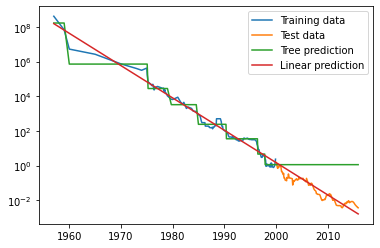

In [37]:
plt.semilogy(data_train.date, data_train.price, label = "Training data")
plt.semilogy(data_test.date, data_test.price, label = "Test data")
plt.semilogy(ram_prices.date, price_tree, label = "Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label = "Linear prediction")
plt.legend()

Tal como se había indicado el modelo realiza predicciones perfectas, debido a que no se controló la compregidad del modelo, pero solo en el *trining set*, en cambio, es incapaz de predecir fuera del rango del *traning*.

Los modelos de árbol son útiles cuando trabajamos con datos de diferentes escalas, o bien estamos combinando variables contínuas con variables binarias. Sin embargo, aún con el *pre-prunind* los árboles tienden a sobreajustar, y por ende tienen un bajo perfil de generalización.

### Ensambles de árboles de decisión 

Los métodos de ensable combinan múltiples algoritmos de *machine learning* para crear modelos más poderosos. Aunque existen varias aproximaciones los más populares son *random forest* y *gradient boosted*.


#### Randmom forests

El mayor problema con los árboles de desición es que tienden a *overfit* los datos. Un *random forest*  consiste en un arreglo de múltipls *random forest* un poco diferentes entre ellos. Cada uno hará un buen trabajo prediciendo los datos, pero también sobreajustando (*overffiting*) los datos. Si sonstruimos muchos *dessision trees* que trabajan bien , pero en diferentes formas podemos reducir el sobreajustre promediando los resultados.

La estrategia de *random forest* debe su nombre a que agrega aleatoreidad a cáda árbol para asegurarse que sean diferentes entre ellos. Existen dos posibilidades para agregar aleatoreidad al sistema:
1. Seleccionando las filas (datos puntuales) que van a ser empleados en cada modelo de forma aleatoria
2. Seleccionando las variables (columnas) que van a ser ajustados en cada modelo de forma aleatoria

Para ajustar el modelo es necesario sintonizar los parámetros de *n_stimators*. Por ejemplo tomemos uno de 10 árboles. Cada árbol será independiente de los demás. EL algoritmo primero creará un *bootstrap sample* de la base, con remplazo. Esto implicaque que la base será más grande que la original, pero contendrá algunas observaciones repetidas, además de que no todas las observaciones estarán presentes. Posteriormente en cada nodo seleccionará de forma aleatoria diferentes features. El número de *features* seleccionadas se controla mediante el parámetro *max_features*. EL *bbotstrap* permite que cada árbol sea entrenado mediante una *dataset* ligeramente diferente, al igual que con un set de *features* ligeramnete diferente.
    Un parámetro crítico es *max_features* ue indica el número de *features* que serán escogidos en cada árbol. Un número demasiado alto probocará que cada árbol sea muy similar, mientras uno demasiado bajo probocará un gran sobreajuste. 
    El algoritmo realizará una predicción para cada modelo y después:
1. En el caso de regreción: Promediará los resultados.
2. En el caso de clasificación: Seguirá la estrategia de *soft voting*. Cada algoritmo estimará la probabilidad de que resulte cada una de las posibles etiquetas. Estas probabilidades serán promediadas y se eligirá la mejor.

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
X,y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

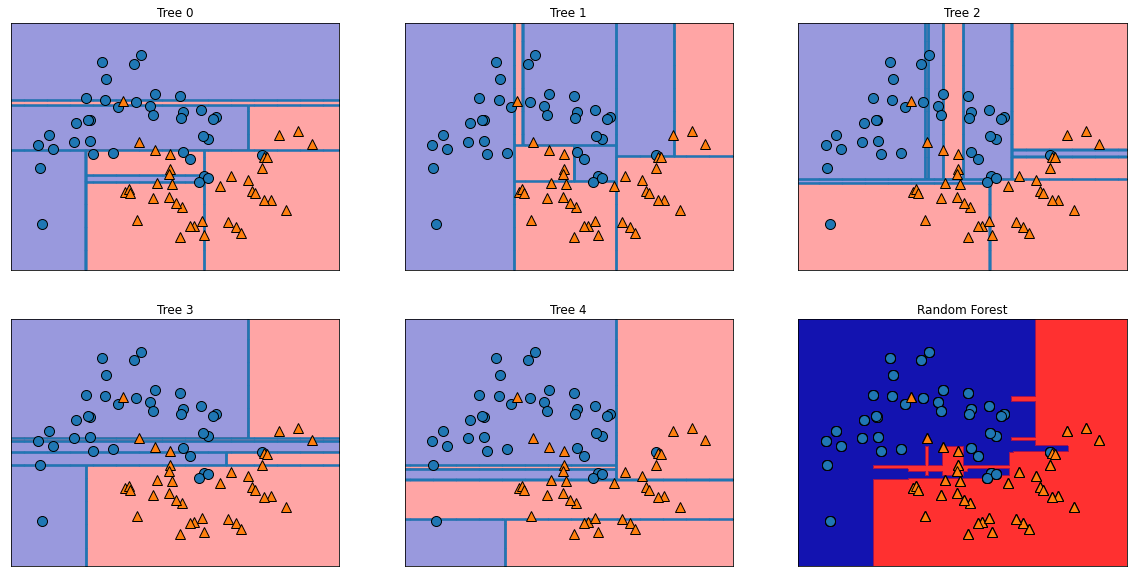

In [4]:
fig, axes = plt.subplots(2,3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    mglearn.plots.plot_2d_separator(forest, X_train, fill = True, ax=axes[-1,-1], alpha=0.4)
    axes[-1,-1].set_title("Random Forest")
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)

Las bandas de desición de cada árbol son claramente diferentes. Cada árbol comete algunos errores, además de que no todos los puntos son agregados a los árboles. En aplicaciones reales es posible que la cantidad de árboles (*estimators*), puede ser de cientos o incluso de miles.

Apliquemos esta técnica a la base de cancer:

In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100,random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


El modelo muestra un mejor desempeño en el *test set* que las regresiones lineales, además no es necesario ajustar ningún parámetro. El *random forest* también nos provee con la importancia de los parámetros, y tipicamente esta es mejor que la de los árboles individuales:

In [7]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)
    
plot_feature_importances_cancer(forest)

NameError: name 'forest' is not defined

El parámetro *n_jobs* permite indicar el número de núcleos que desean usarce en el cálculo. Para usar todos los *cores* del la computadora usa *n_jobs=-1*.
Los *random forest* no tienen un buen desempeño con datos de dimenciones muy grandes o muy dispersos (*sparse data*) como las aplicaciones de texto. EN estos casos los modelos lineales son más apropiados.

### Gradient boosted regression trees (gradient boosting machines)

Este modelo puede ser usado en regresión o en clasificación. Este modelo encadena árboles de desición en serie. Cada árbol busca corregir los errores del anterior. Por definición no se aplica *randomización* a este modelo de ensamble, pero se le aplica un intenso proceso de *prepruning*. Por tal motivo los árboles tienden a ser poco profundos, y por por lo regular de entre uno y cinco, por lo cuál emplean pocos recursos de memoria. La idea es combinar múltiples modelos simples.
Suelen ser usados frecuentemente en competiciones de datos y están muy generalizados en la industría. Son más sensibles al ajuste de parámetros. También cuentan con *pre-pruning* y con *n_estimators*, además de *learning_rate* controla que tan fuerte es la corrección de errores de los árboles previos.Un *learning_rate* alto implica que cada cada árbol realiza correcciones más estrictas del árbol anterior permitiendo modelos más complejos.

A continuación un ejemplo empleando la base de cancer:

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)

gbrt.fit(X_train, y_train)

print("Accuracy on trining set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))


Accuracy on trining set: 1.000
Accuracy on test set: 0.965


Para reducir el *overfitting* podemos reducir la complegidad del modelo intensificando el *prepruning*

In [5]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on trining set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))


Accuracy on trining set: 0.991
Accuracy on test set: 0.972


In [9]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on trining set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on trining set: 0.627
Accuracy on test set: 0.629


Una alta *max_depth* reduce la compeljidad del modelo, mejorando su generalización y reduciendo el *overfiting*.


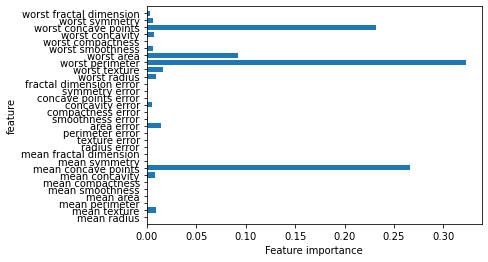

In [11]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)   
plot_feature_importances_cancer(gbrt)

Los *Gradient Boost* son modelos muy poderorsos y muy empleados, su principal desventaja es que pueden demorarce en ajustar yal necesitar sintonizar el parámetro esto puede tomar tiempo. EL modelo funciona bien aún sin escalar los datos y combinando variables contínuas y binarias. AL igual que otros modelos, no funciona muy bien con datos de grandes dimenciones(múltiples *features*), especialmente cuando se tarta de *sparse data*

Principales parámetros:
- *n_estimators* -> EL número de árboles del ensamble
- *learning_rate* -> Más árboles serán necesarios para ajustar el modelo
- *max_depth* -> Reduce la complejidad de cada árbol

### Kernelized Support Vector Machines (SVM)

Son una extención de las *linear support vector machines* para modelos más complejos.

Text(0, 0.5, 'Feature 1')

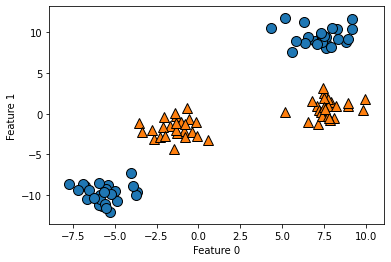

In [6]:
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=4, random_state = 8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Un modelo lineal de clasificación únicamente es capaz de separar los puntos mediante líneas.

/Users/juliovicenteguadarrama/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(0, 0.5, 'feature 1')

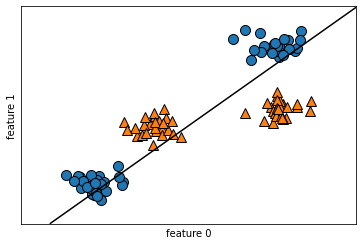

In [7]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X,y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:,1],y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

Ahora vamos a expandir añadiendo el cuadrado del suegundo *feature*. Lo cuál permitirá representar los puntos en un espacio 3D:

$(feature0, feature1, feature1 ** 2)$

Text(0.5, 0, 'feature1 ** 2')

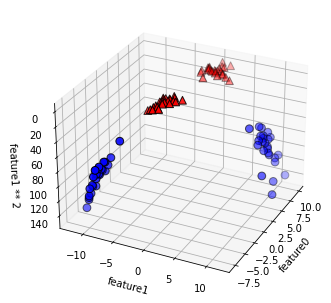

In [13]:
X_new = np.hstack([X,X[:,1:] ** 2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# Visualización 3d
ax = Axes3D(figure, elev=-152, azim=-26)
# graficamos los puntos con y = 0 después los de y = 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2,s=60, edgecolors='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2,s=60, edgecolors='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

Esta nueva representación si nos permite separar las dos clases empleando un modelo lineal.